# AnyoneAI - Sprint Project 01
> E-Commerce Data Pipeline

In this notebook we will first execute all the components of our ELT pipeline and then plot visualizations with the resulting information.


In [1]:
# Importing the necessary libraries
from pandas import DataFrame
from sqlalchemy import create_engine
from typing import Dict
from pathlib import Path

from src.transform import QueryEnum
from src import config
from src.transform import run_queries
from src.extract import extract
from src.load import load
from src.plots import (
    plot_freight_value_weight_relationship,
    plot_global_amount_order_status,
    plot_real_vs_predicted_delivered_time,
    plot_revenue_by_month_year,
    plot_revenue_per_state,
    plot_top_10_least_revenue_categories,
    plot_top_10_revenue_categories,
    plot_top_10_revenue_categories_ammount,
    plot_delivery_date_difference,
    plot_order_amount_per_day_with_holidays,
)

Cargando datos en la base de datos...
¡Datos cargados exitosamente!


In [2]:
# Create the database sql file
Path(config.SQLITE_BD_ABSOLUTE_PATH).touch()

# Create the database connection
ENGINE = create_engine(rf"sqlite:///{config.SQLITE_BD_ABSOLUTE_PATH}", echo=False)

### 1. Extract

Here you will be extracting the information from different sources.

In [3]:
csv_folder = config.DATASET_ROOT_PATH
public_holidays_url = config.PUBLIC_HOLIDAYS_URL

# 1. Get the mapping of the csv files to the table names.
csv_table_mapping = config.get_csv_to_table_mapping()

# 2. Extract the data from the csv files, holidays and load them into the dataframes.
csv_dataframes = extract(csv_folder, csv_table_mapping, public_holidays_url)

### 2. Load

Using the diferent datasets provided to you, you will store everything into our Data Warehouse.

In [4]:
load(data_frames=csv_dataframes, database=ENGINE)

Cargando datos en la base de datos...
¡Datos cargados exitosamente!


### 3. Transform

Here you will be transforming the different queries into tables. There are two sections, one with the revenue related queries, and another with the delivery related queries.

##### 3.1 Revenue queries

In [5]:
query_results: Dict[str, DataFrame] = run_queries(database=ENGINE)

In [6]:
# Transforming the revenue_by_month_year query to a table
revenue_by_month_year = query_results[QueryEnum.REVENUE_BY_MONTH_YEAR.value]
revenue_by_month_year

,month_no,month,Year2016,Year2017,Year2018
0,01,Jan,0.00,127545.67,1078606.86
1,02,Feb,0.00,271298.65,966510.88
2,03,Mar,0.00,414369.39,1120678.00
3,04,Apr,0.00,390952.18,1132933.95
4,05,May,0.00,567066.73,1128836.69
5,06,Jun,0.00,490225.60,1012090.68
6,07,Jul,0.00,566403.93,1027903.86
7,08,Aug,0.00,646000.61,985414.28
8,09,Sep,0.00,701169.99,0.00
9,10,Oct,46566.71,751140.27,0.00


In [7]:
# Transforming the top_10_revenue_categories query to a table
top_10_revenue_categories = query_results[QueryEnum.TOP_10_REVENUE_CATEGORIES.value]
top_10_revenue_categories

,Category,Num_order,Revenue
0,health_beauty,8647,1412089.53
1,watches_gifts,5493,1264016.98
2,bed_bath_table,9272,1225209.26
3,sports_leisure,7529,1118062.91
4,computers_accessories,6529,1032603.65
5,furniture_decor,6307,880329.92
6,housewares,5743,758392.25
7,cool_stuff,3559,691680.89
8,auto,3809,669319.92
9,garden_tools,3448,567145.68


In [8]:
# Transforming the top_10_least_revenue_categories query to a table
top_10_least_revenue_categories = query_results[
    QueryEnum.TOP_10_LEAST_REVENUE_CATEGORIES.value
]
top_10_least_revenue_categories

,Category,Num_order,Revenue
0,security_and_services,2,324.51
1,fashion_childrens_clothes,7,598.67
2,cds_dvds_musicals,12,954.99
3,home_comfort_2,24,1170.58
4,flowers,29,1598.91
5,diapers_and_hygiene,25,2046.19
6,arts_and_craftmanship,23,2184.14
7,la_cuisine,13,2388.54
8,fashion_sport,26,2657.55
9,fashio_female_clothing,36,3218.44


In [9]:
# Transforming the revenue_per_state query to a table
revenue_per_state = query_results[QueryEnum.REVENUE_PER_STATE.value]
revenue_per_state

,customer_state,Revenue
0,SP,5769081.27
1,RJ,2055690.45
2,MG,1819277.61
3,RS,861608.40
4,PR,781919.55
5,SC,595208.40
6,BA,591270.60
7,DF,346146.17
8,GO,334294.22
9,ES,317682.65


##### 3.2 Delivery queries

In [10]:
# Transforming the delivery_date_difference query to a table
delivery_date_difference = query_results[QueryEnum.DELIVERY_DATE_DIFFERECE.value]
delivery_date_difference

,State,Delivery_Difference
0,AC,20
1,AL,8
2,AM,19
3,AP,19
4,BA,10
5,CE,10
6,DF,12
7,ES,10
8,GO,12
9,MA,9


In [11]:
# Transforming the real vs predicted delivered time query to a table per month and year
real_vs_estimated_delivered_time = query_results[
    QueryEnum.REAL_VS_ESTIMATED_DELIVERED_TIME.value
]
real_vs_estimated_delivered_time

,month_no,month,Year2016_real_time,Year2017_real_time,Year2018_real_time,Year2016_estimated_time,Year2017_estimated_time,Year2018_estimated_time
0,01,Jan,NaN,8.602918,15.330987,NaN,38.093287,26.605709
1,02,Feb,NaN,10.331250,14.672381,NaN,34.958037,26.100344
2,03,Mar,NaN,11.908795,15.365344,NaN,25.756345,22.557836
3,04,Apr,NaN,12.813702,15.366259,NaN,26.809681,23.012420
4,05,May,NaN,12.943527,11.861215,NaN,24.909502,22.418769
5,06,Jun,NaN,11.679506,11.721084,NaN,24.614169,27.801868
6,07,Jul,NaN,11.289015,9.149208,NaN,23.095980,22.123831
7,08,Aug,NaN,11.000487,8.741144,NaN,23.493587,16.407960
8,09,Sep,NaN,12.487484,40.148743,NaN,22.067024,16.967427
9,10,Oct,14.480048,11.757649,114.608503,55.310101,23.644691,30.519884


In [12]:
# Transforming the global ammount of order status query to a table
global_ammount_order_status = query_results[QueryEnum.GLOBAL_AMMOUNT_ORDER_STATUS.value]
global_ammount_order_status

,order_status,Ammount
0,approved,2
1,canceled,625
2,created,5
3,delivered,96478
4,invoiced,314
5,processing,301
6,shipped,1107
7,unavailable,609


In [13]:
orders_per_day_and_holidays = query_results[
    QueryEnum.ORDERS_PER_DAY_AND_HOLIDAYS_2017.value
]
orders_per_day_and_holidays

,date,order_count,holiday
0,2017-01-05,32,False
1,2017-01-06,4,False
2,2017-01-07,4,False
3,2017-01-08,6,False
4,2017-01-09,5,False
...,...,...,...
356,2017-12-27,167,False
357,2017-12-28,146,False
358,2017-12-29,135,False
359,2017-12-30,97,False


In [14]:
freight_value_weight_relationship = query_results[
    QueryEnum.GET_FREIGHT_VALUE_WEIGHT_RELATIONSHIP.value
]

### 4. Plotting the query tables

Now, we will create plots from the different queries

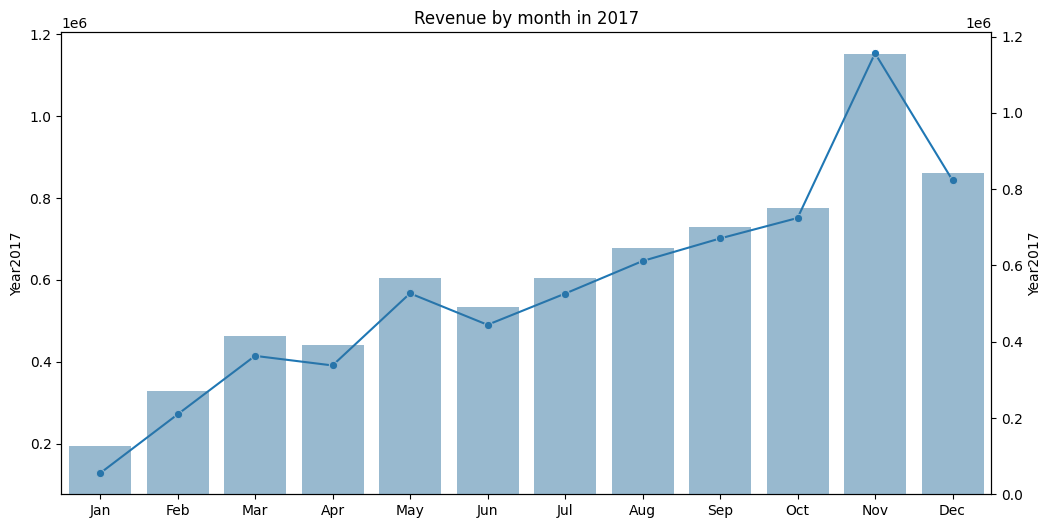

In [15]:
plot_revenue_by_month_year(revenue_by_month_year, 2017)

In [16]:
plot_top_10_revenue_categories(top_10_revenue_categories)

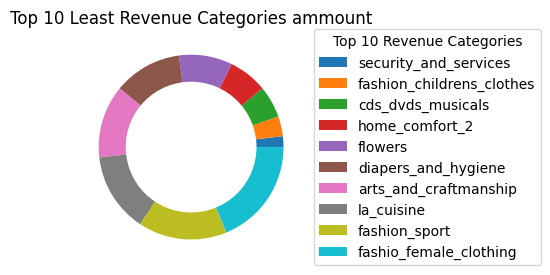

In [17]:
plot_top_10_least_revenue_categories(top_10_least_revenue_categories)

In [18]:
plot_revenue_per_state(revenue_per_state)

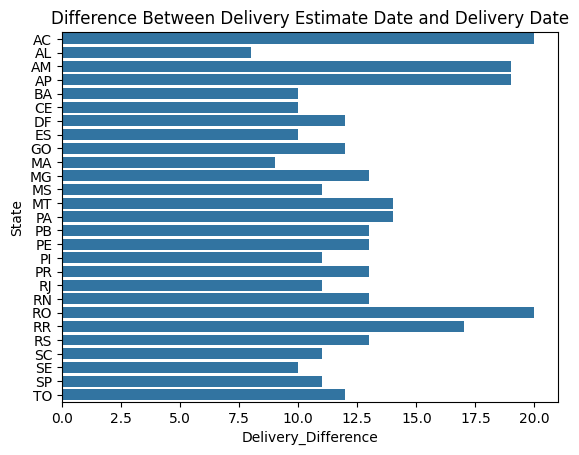

In [19]:
plot_delivery_date_difference(delivery_date_difference)

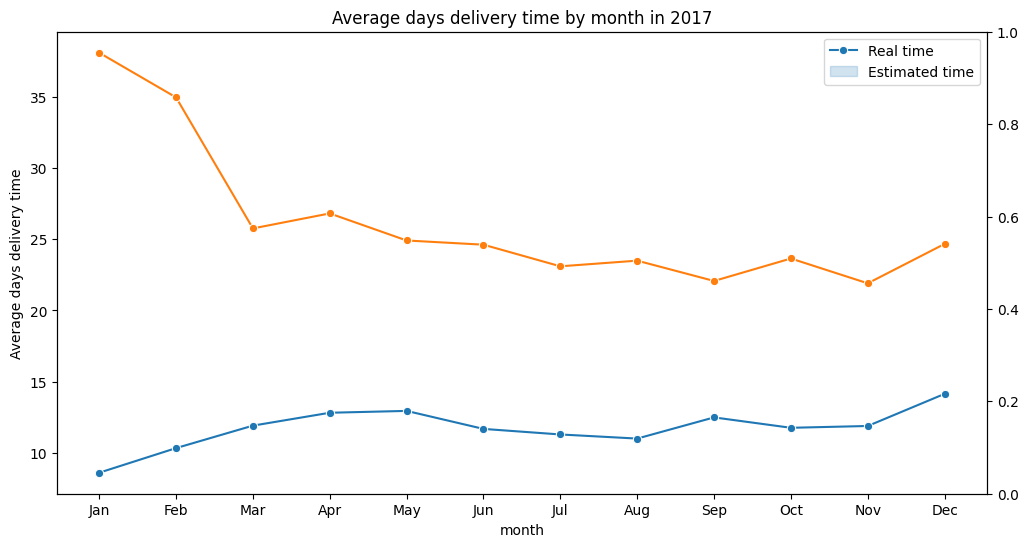

In [20]:
plot_real_vs_predicted_delivered_time(real_vs_estimated_delivered_time, year=2017)

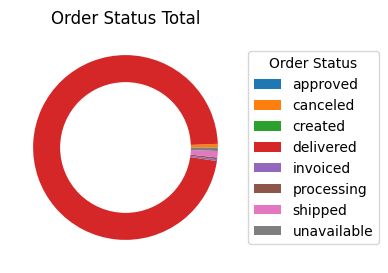

In [21]:
plot_global_amount_order_status(global_ammount_order_status)

In [22]:
#orders_per_day_and_holidays.columns
plot_order_amount_per_day_with_holidays(orders_per_day_and_holidays)

Index(['date', 'order_count', 'holiday'], dtype='object')

The Orders per Day and Holidays plot you will code in src/plots.py has to be similar to this:

![The plot you will code will be similar to this:](images/orders_per_day_and_holidays.png "Orders per Day and Holidays")

4.1 Do you see any relationship between the Brazilian public holidays of 2017 and that year's purchases?

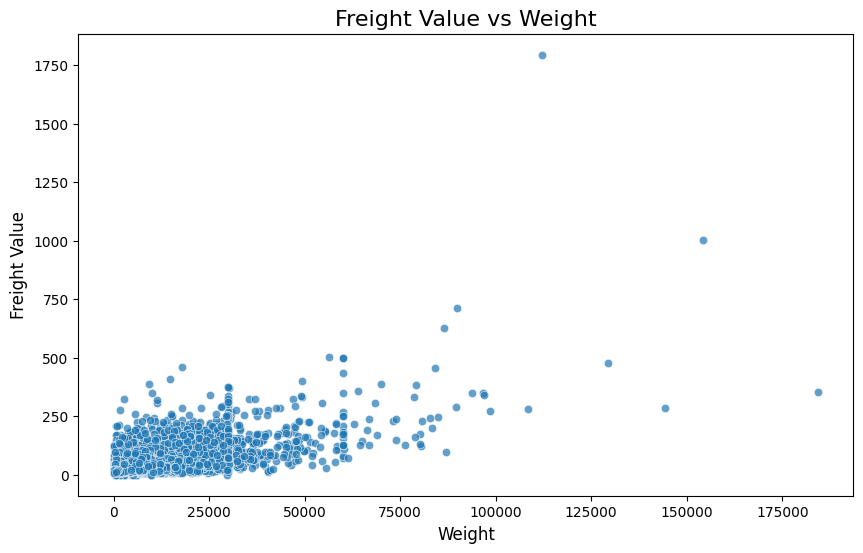

In [24]:
#freight_value_weight_relationship.columns
plot_freight_value_weight_relationship(freight_value_weight_relationship)

The Freight Value and Weight Relationship plot you will code in src/plots.py has to be similar to this:

![The plot you will code will be similar to this:](images/freight_value_weight_relationship.png "Freight Value and Weight Relationship")

4.2 Do you see any correlation between the freight value and the product weight?